[[ 1.  8.  3. ...  3.  3.  1.]
 [ 1.  8.  8. ...  7.  8.  7.]
 [ 1.  1.  1. ...  3.  1.  1.]
 ...
 [ 1. 10. 10. ...  8.  1.  5.]
 [ 1.  3. 10. ...  5.  1.  4.]
 [ 1.  1.  1. ...  1.  1.  1.]]
Accuracy: 0.9343065693430657


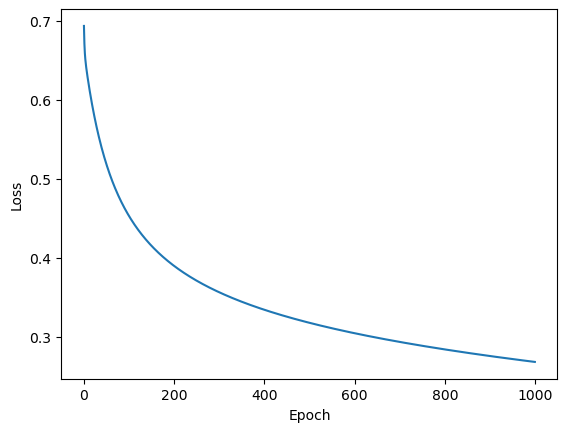

In [46]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#手撕实现逻辑回归（不使用机器学习的库）
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def gradient_descent(X, y, alpha, epochs):
    #  alpha == learning rate
    m, n = X.shape
    #  theta == matrix of weight 
    theta = np.zeros(n)
    losses = []
    for _ in range(epochs):
        y_pred = sigmoid(np.dot(X, theta))
        loss = -(1/m) * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
        gradient = (1 / m) * np.dot(X.T, y_pred - y)
        #  theta == matrix of weight 
        theta -= alpha * gradient
        losses.append(loss)
    return theta, losses

def logistic_regression(X, y, alpha=0.01, epochs=1000):
    m, n = X.shape
    X = np.column_stack((np.ones(m), X)) 
    print(X)
    y = y.astype(float)
    theta, losses = gradient_descent(X, y, alpha, epochs)
    return theta, losses


data = pd.read_csv('breast-cancer-wisconsin.data', header=None)
data = data.replace('?', np.nan).dropna().astype(int)  # 如果不astype(转成int)就是object类型，是字符串
target = data.iloc[:, -1].replace({2: 0, 4: 1}).values   # Series.values cai h
features = data.iloc[:, 1:-1].values


np.random.seed(42) # 
indices = np.random.permutation(len(target)) # permutation排列
train_size = int(0.8 * len(target))
train_indices = indices[:train_size]
test_indices = indices[train_size:]
X_train, y_train = features[train_indices], target[train_indices]
X_test, y_test = features[test_indices], target[test_indices]


theta, losses = logistic_regression(X_train, y_train)
X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))  
y_pred = (sigmoid(np.dot(X_test, theta)) > 0.5).astype(int)  


correct_predictions = np.sum(y_test == y_pred)
accuracy = correct_predictions / len(y_test)
print('Accuracy:', accuracy)

plt.plot(range(len(losses)), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [39]:
train_indices = indices[:train_size]
train_indices

array([292, 145, 211, 118, 302, 375, 355, 158, 335, 581, 321, 514, 213,
       176, 265, 220,  90,  54, 388, 181, 148, 650, 377, 291, 311, 644,
       227, 571, 135, 473, 329, 499, 304,  63,  77, 563, 467, 380, 109,
        72, 132, 212, 451,  10, 294, 610, 165, 326, 674,  31,  78, 633,
       360, 264, 670, 500,  55, 271, 529, 120, 136, 431,   2, 425, 678,
       354, 314, 101, 662,  81, 412, 289,  76, 174, 296,  60, 532,  30,
        69, 209, 215,  44,  70, 204, 488, 223, 133, 521, 155, 558, 523,
        65, 636,  49, 328, 131,  39, 306, 250,   6, 583, 349, 259, 164,
       589, 342, 327, 679, 199,  86, 182, 290, 247, 634, 192, 497,  41,
       487, 108, 530,  56, 664, 281, 495, 631, 234, 588, 318,  24, 404,
       602, 638, 110,  82,  51, 210, 548, 437, 256, 584,  18, 350, 528,
       465, 208,  61, 248, 533,  29, 336, 408, 544, 319, 422, 482, 357,
       332, 235, 218, 669, 468, 405, 490, 542, 639, 640, 163, 278, 597,
       464, 334, 453, 395, 104, 114, 612, 353, 448,  92,   7,  8

In [41]:
features[train_indices]

array([[ 8,  3,  4, ...,  3,  3,  1],
       [ 8,  8,  7, ...,  7,  8,  7],
       [ 1,  1,  1, ...,  3,  1,  1],
       ...,
       [10, 10, 10, ...,  8,  1,  5],
       [ 3, 10,  3, ...,  5,  1,  4],
       [ 1,  1,  1, ...,  1,  1,  1]])

In [45]:
features[211]

array([1, 1, 1, 1, 2, 1, 3, 1, 1])